<a href="https://colab.research.google.com/github/vithika-karan/Email-Marketing-Effectiveness-Prediction/blob/main/Email_Campaign_Effectiveness_Prediction_Vithika_Karan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Project Title : Email Campaign Effectiveness Prediction**


##**Problem Description**

Most of the small to medium business owners are making effective use of Gmail-based
Email marketing Strategies for offline targeting of converting their prospective customers into
leads so that they stay with them in Business.
The main objective is to create a machine learning model to characterize the mail and track
the mail that is ignored; read; acknowledged by the reader.
Data columns are self-explanatory.

##Introduction:
Email Marketing can be defined as a marketing technique in which businesses stay connected with their customers through emails, making them aware about their new products, updates, important notices related to the products they are using.

Most importantly, email marketing allows businesses to build relationships with leads, customers and past customers. It's a way to communicate directly to the customers in their inbox, at a time that is convenient for them. With the right messaging tone and strategies, emails are one of the most important marketing channels.

We all subscribe to many different kinds of businesses through emails because it's required to do so, sometimes to get digital receipts of the things we bought or to get digital information about the business to stay updated. But many of times we do not tend to read an email due to a number of reasons - to name a few would be no proper structure, too many images, too many links inside the mail, complex vocabulary used or simply too long emails.

In this problem statement, we will be trying to create machine learning models that characterize and predict whether the mail is ignored, read or acknowledged by the reader. In addition to this, we will be trying to analyze and find all the features that are important for an email to not get ignored.

So let's begin!

In [154]:
#Importing important libraries and modules
#for data reading and manipulation
import pandas as pd
import numpy as np

#for data visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.rcParams.update({'figure.figsize':(8,5),'figure.dpi':100})

#to ignore warnings
import warnings    
warnings.filterwarnings('ignore')

In [155]:
#reading the csv dataset
df_orig = pd.read_csv("/content/drive/MyDrive/ALMABETTER/CAPSTONE PROJECTS/Email Campaign Effectiveness Prediction - Vithika Karan/Copy of data_email_campaign.csv")

In [156]:
#first look of our dataset
df_orig.head()

,Email_ID,Email_Type,Subject_Hotness_Score,Email_Source_Type,Customer_Location,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
0,EMA00081000034500,1,2.2,2,E,2,33.0,1,440,8.0,0.0,0
1,EMA00081000045360,2,2.1,1,NaN,2,15.0,2,504,5.0,0.0,0
2,EMA00081000066290,2,0.1,1,B,3,36.0,2,962,5.0,0.0,1
3,EMA00081000076560,1,3.0,2,E,2,25.0,2,610,16.0,0.0,0
4,EMA00081000109720,1,0.0,2,C,3,18.0,2,947,4.0,0.0,0


In [157]:
#basic info about our data
df_orig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68353 entries, 0 to 68352
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Email_ID                   68353 non-null  object 
 1   Email_Type                 68353 non-null  int64  
 2   Subject_Hotness_Score      68353 non-null  float64
 3   Email_Source_Type          68353 non-null  int64  
 4   Customer_Location          56758 non-null  object 
 5   Email_Campaign_Type        68353 non-null  int64  
 6   Total_Past_Communications  61528 non-null  float64
 7   Time_Email_sent_Category   68353 non-null  int64  
 8   Word_Count                 68353 non-null  int64  
 9   Total_Links                66152 non-null  float64
 10  Total_Images               66676 non-null  float64
 11  Email_Status               68353 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 6.3+ MB


##Data Summary:
Our email campaign dataset have 68353 observations and 12 features. Clearly Email_Status is our target variable.

Our features:
* Email Id - It contains the email id's of the customers/individuals
* Email Type - There are two categories 1 and 2. We can think of them as marketing emails or important updates, notices like email regarding the businesses.
* Subject Hotness Score - It is the email's subject's score on the basis of how good and effective the content is
* Email Source - It represents the source of the email like sales and marketing or important admin mails related to the product
* Email Campaign Type - The campaign type
* Total Past Coomunications - This column contains the total previous mails from the same source, the number of communications had
* Customer Location - Contains demographical data of the customer, the location where the customer resides
* Time Email sent Category - It has three categories 1,2 and 3; the time of the day when the email was sent, we can think of it as morning, evening and night time slots.
* Word Count - The number of words contained in the email
* Total links - Number of links in the email
* Total Images - Number of images in the email
* Email Status - Our target variable which contains whether the mail was ignored, read, acknowledged by the reader

##Data Cleaning and PreProcessing:
When we have raw data, it may contain missing values, NaN values or absurd values. It is necessary to check and handle these values before feeding it to the models, so as to obtain good insights on what the data is trying to say and make great characterisation and prediction which will in turn help improve the business's content. 

In [158]:
#get the num of nulls in each column
df_orig.isnull().sum()

Email_ID                         0
Email_Type                       0
Subject_Hotness_Score            0
Email_Source_Type                0
Customer_Location            11595
Email_Campaign_Type              0
Total_Past_Communications     6825
Time_Email_sent_Category         0
Word_Count                       0
Total_Links                   2201
Total_Images                  1677
Email_Status                     0
dtype: int64

We have a lot of nulls in the following columns:
* Customer Location
* Total Past Communications
* Total Links
* Total Images


But particularly customer location has a lot of them. Since it is a categorical column and it is difficult to just impute them with our understanding of where the customer's location is, we'll see how much it affects our target variable, whether a particular location has anything to do with it or it is not correlated at all and accordingly we can decide on it later on.
Let's fill up the null values in other columns.

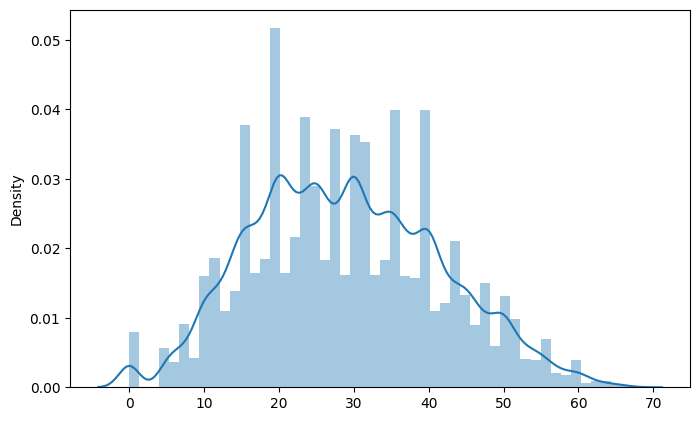

In [159]:
#let's see the distribution of Total Past Communications to get what majority of the data tends to so that we can fill it accordingly
sns.distplot(x=df_orig['Total_Past_Communications'], hist = True)

We have kind of a normal ditribution for Total Past Communications and it will be fine, if we use mean to fill up the null values of this column.

In [160]:
#filling up the null values for total past comm
df_orig['Total_Past_Communications'].fillna(df_orig['Total_Past_Communications'].mean(), inplace = True)

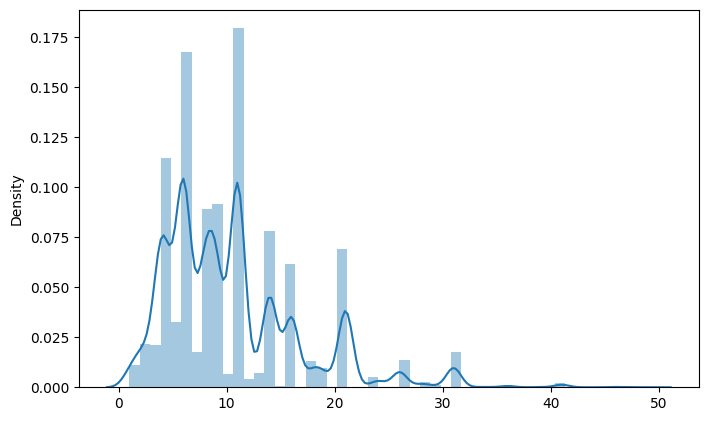

In [161]:
#let's see the distribution of Total Links to get what majority of the data tends to so that we can fill it accordingly
sns.distplot(x=df_orig['Total_Links'], hist= True)

It seems like most of the values of the Total Links in the column are between 0-10 and the distribution is skewed on the right. Mode is more robust to outlier effect.

In [162]:
#filling up the Total Links Column
df_orig['Total_Links'].fillna(df_orig['Total_Links'].mode()[0], inplace = True)

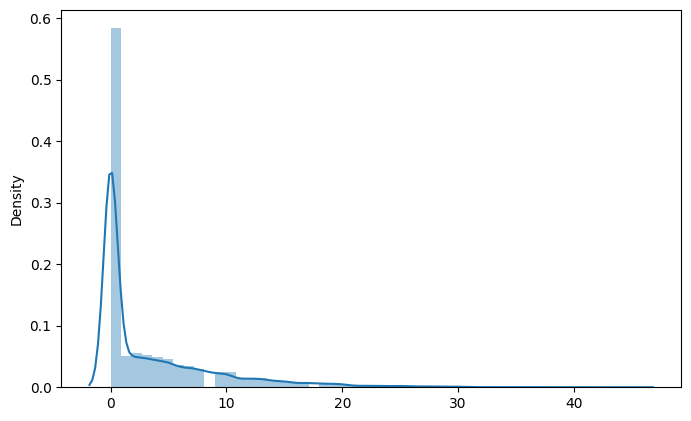

In [163]:
#total image distribution
sns.distplot(x=df_orig['Total_Images'], hist=True)

The number of images in most of the emails seems to be 0 or fewer than 3-4. It would be wise to fill the null values with mode values.

In [164]:
#filling up the Total Images Column
df_orig['Total_Images'].fillna(df_orig['Total_Images'].mode()[0], inplace = True)

In [165]:
#check for duplicates
df_orig.duplicated().sum()

0

##Exploratory Data Analysis:
Exploratory data analysis is an important part of data analysis. It involves exploring and analysing the dataset given to find out patterns, trends and conclusions to take better decisions related to the data. In this section we will be trying to obtain those features which help our emails not get ignored.

We will explore every feature against our target variable and analyse it's influence on it.

####Categorical Variables:
We have six categorical variables Email Type, Email Source, Email Campaign Type, Time Email sent Category, Customer Location and Email Status. We should keep in mind that we have a lot of null values in Customer Location feature and after analysing it's influence on our target variable, we will fill it accordingly or remove it. If a particular location is influencing our target variables and aiding in to getting it ignored or otherwise, it should be filled on a condition (on Email Status) row wise.

####Continuous Variables:
Our continuous variables include Subject Hotness Score, Total Past Communications, Word Count, Total Links and Total Images. 

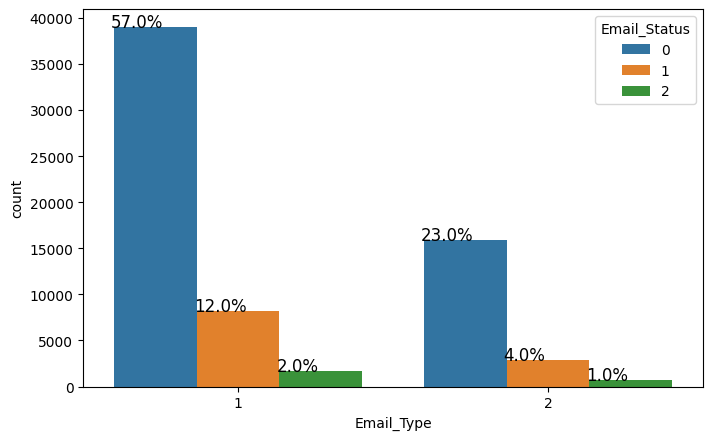

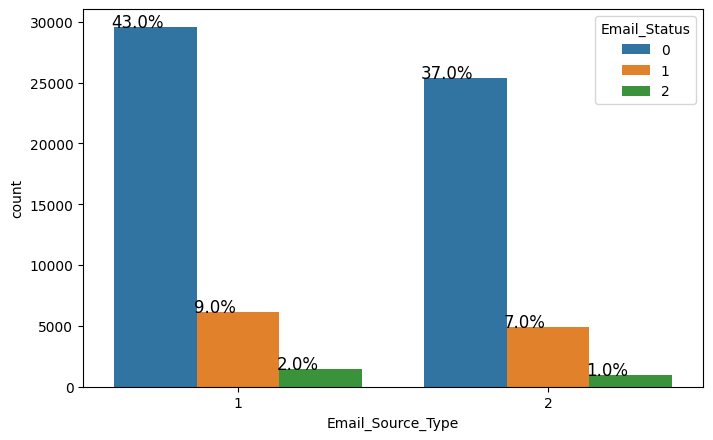

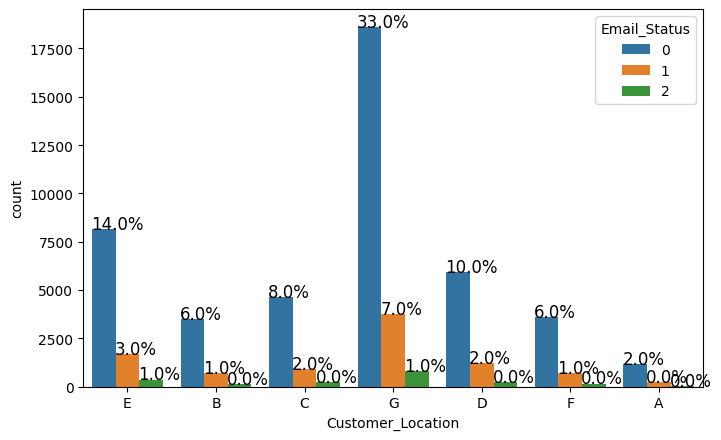

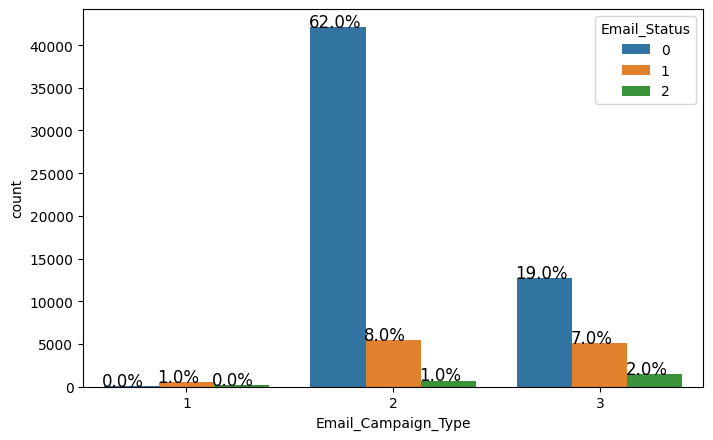

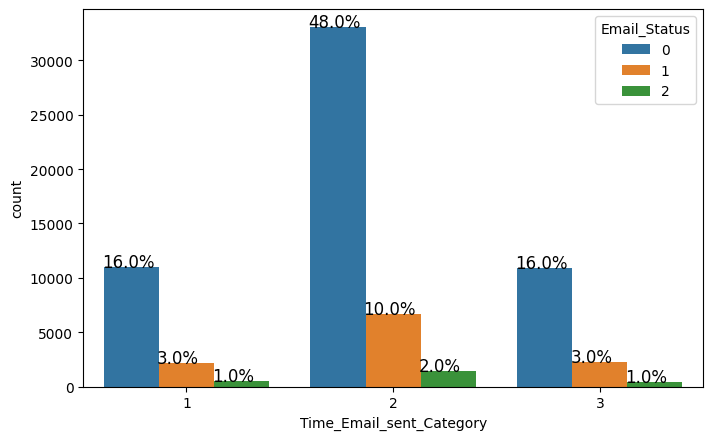

In [166]:
#starting with categorical variables
categorical_variables = ['Email_Type','Email_Source_Type','Customer_Location','Email_Campaign_Type','Time_Email_sent_Category']
Target_var = ['Email_Status']

for i,value in enumerate(categorical_variables):
  ax = sns.countplot(x=df_orig[value], hue=df_orig[Target_var[0]])
  totals = []
  for i in ax.patches:
      totals.append(i.get_height())

  total = sum(totals)

  for i in ax.patches:
      ax.text(i.get_x() - .01, i.get_height() + .5, \
            str(round((i.get_height()/total)*100, 0))+'%', fontsize=12)
  plt.show()
              

**Observation:** 

* The email type 1 which may be considered as promotional emails are sent more than email type 2 and hence are read and acknowledged more than the other type.

* Email source type shows kind of a similar pattern for both the categories.

* In the customer location feature we can find that irrespective of the location, the percentage ratio of emails being ignored, read and acknowledge are kind of similar. It does not exclusively influence our target variable. It would be better to not consider location as factor in people ignoring, reading or acknowledging our emails. Other factors should be responsible in why people are ignoring the emails not location.

* In the Email Campaign Type feature, it seems like in campaign type 1 very few emails were sent. Most emails were sent under email campaign type 2 and most ignored. Seems like campaign 3 was a success as even when less number of emails were sent under campaign 3, more emails were read and acknowledged.

* If we consider 1 annd 3 as morning and night category in time email sent feature, it is obvious to think 2 as middle of the day and as expected there were more emails sent under 2nd category than either of the others, sending emails in the middle of the day could lead to reading and opening the email as people are generally working at that time and they frequently checkup their emails, but it cannot be considered as the major factor in leading to acknowledged emails.




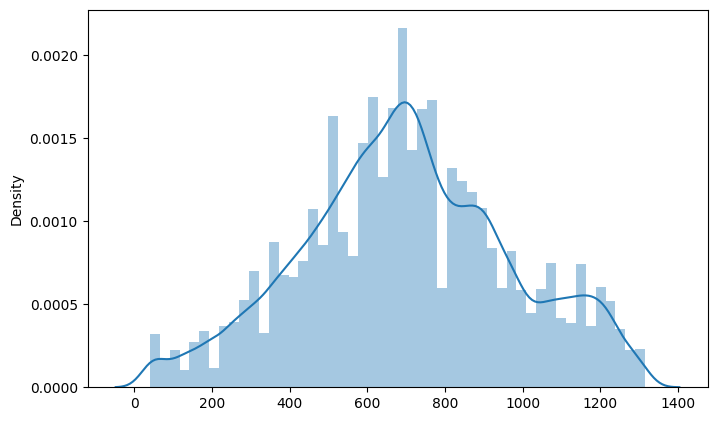

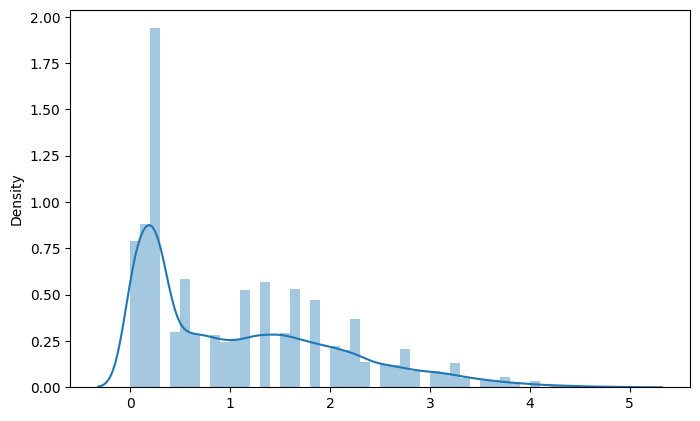

In [167]:
#continuous variables
#distribution of other continuous features and understanding where the data tends to
cont_var = ['Word_Count','Subject_Hotness_Score']
for i, value in enumerate(cont_var):
 sns.distplot(x=df_orig[value], hist = True)
 plt.show()

We already saw the distribution plots of Total Links, Total Images and Total Past Communications earlier. Here we see that Word Count just as Total Past Communications has a normal distribution. All of the rest are rightly skewed.

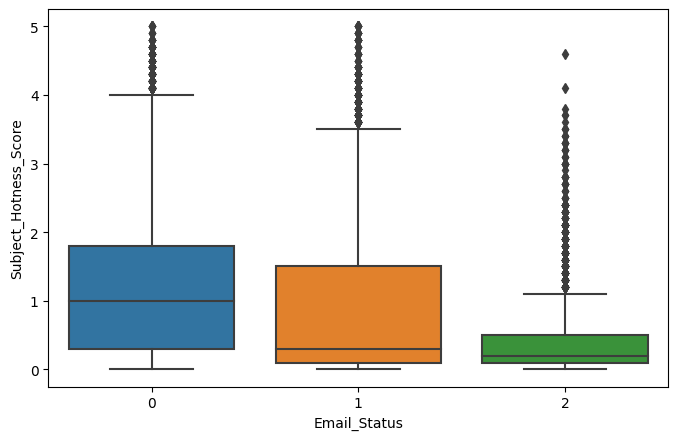

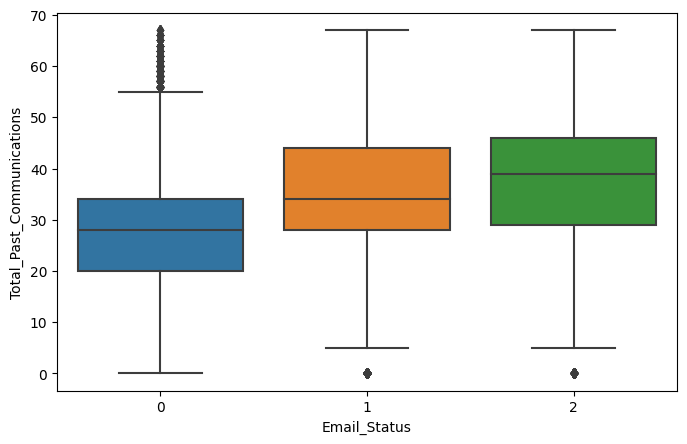

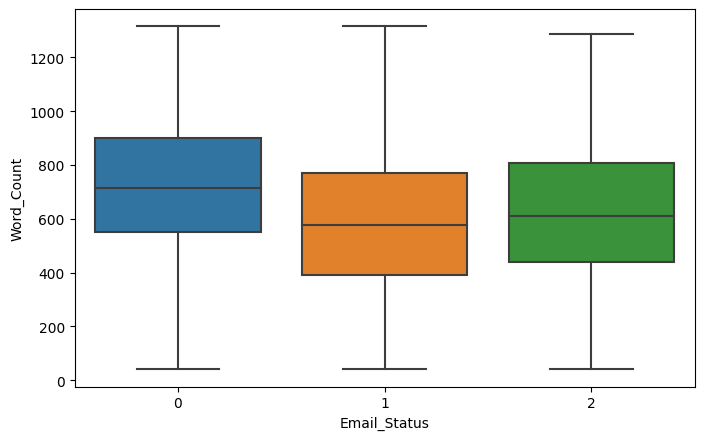

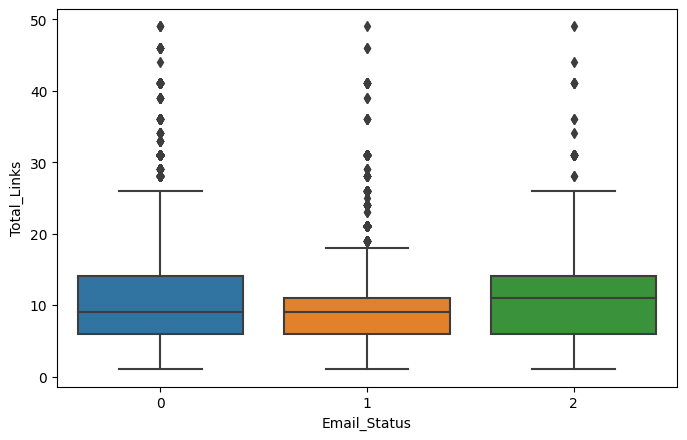

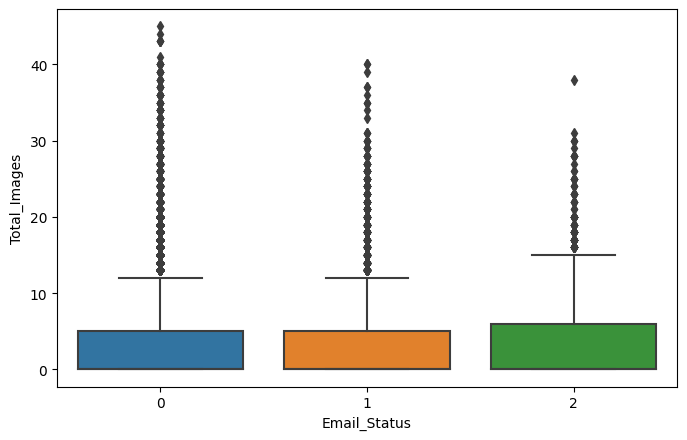

In [168]:
#continuous variables through boxplots
cont_var = ['Subject_Hotness_Score', 'Total_Past_Communications','Word_Count','Total_Links','Total_Images']
for i, value in enumerate(cont_var):
 sns.boxplot(x=df_orig['Email_Status'], y= df_orig[value])
 plt.show()


**Observation:**

* In the subject hotness score, median of ignored emails was around 1 with a few outliers. Acknowledged emails has the most outliers.

* Analyzing total past communications, we can see that the more the number of previous emails, the more it leads to read and acknowledged emails. This is just about making connection with your customers.

* The more the words in an email, the more it has a tendency to get ignored. Too lengthy emails are getting ignored.

* The median is kind of similar in all of the three cases in total links feature with a number of outliers.

* More images were there in ignored emails.

**Correlation:**
To get an understanding of how much correlated, positively or negatively our features is with our target variable, we will be creating a correlation matrix.

We will be removing Customer location and Email Id features. They will not contribute in deciding whether a customer will ignore, read, acknowledge the email.
Let's get to it.



In [169]:
#dropping columns
columns_to_drop = ['Email_ID','Customer_Location']
df = df_orig.drop(columns_to_drop,axis=1)

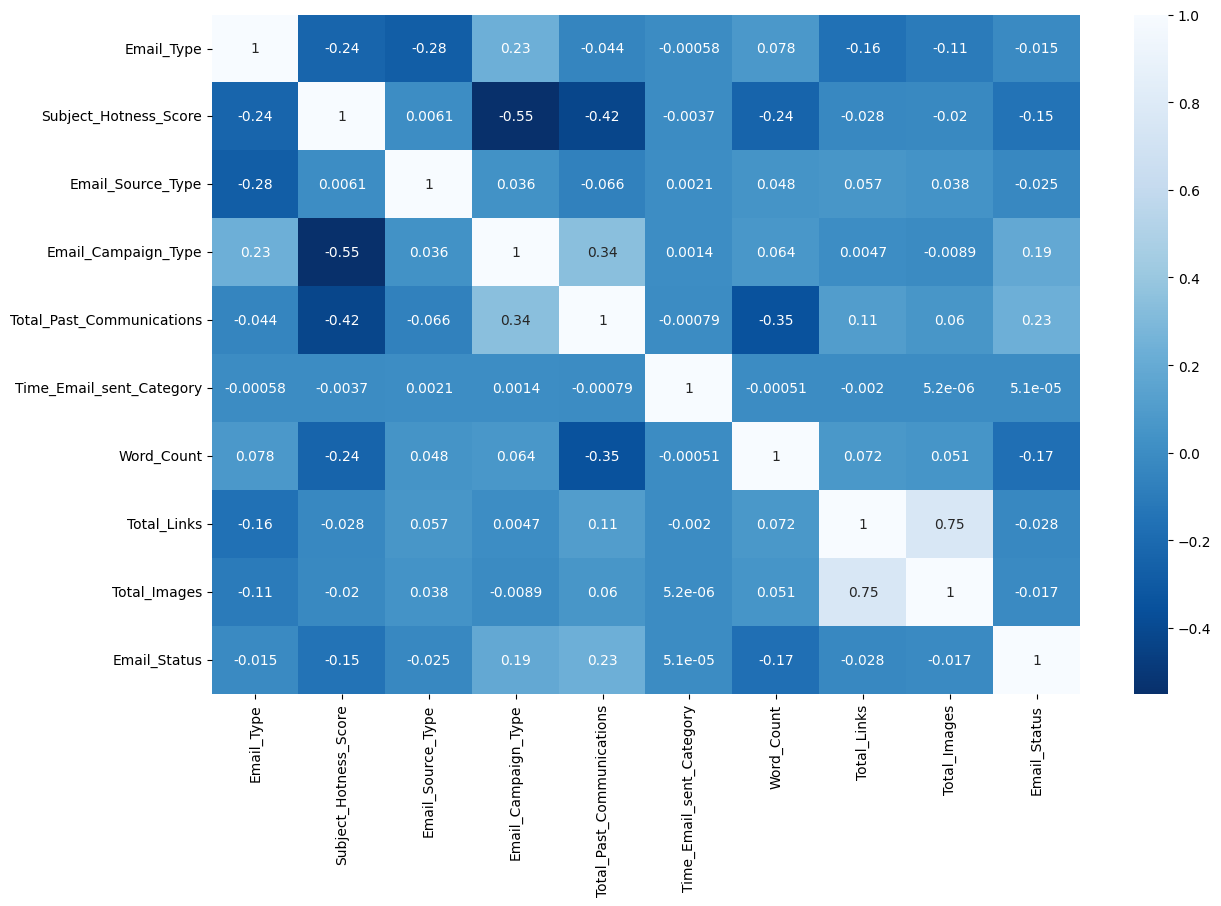

In [171]:
#correlation matrix
plt.figure(figsize=(14,9))
sns.heatmap(df.corr(), cmap='Blues_r', annot=True)

**Observation:**
Correlation matrix justifies our earlier hypotheses. Email Campaign Type and Total past communication shows positive correlation with emails being read and acknowledged.
Word Count and Subject Hotness score are the most negatives amongst other. We can see multicollinearity involved and we will have to deal with it.
